# Titanic

`RMS Titanic` was a British passenger liner that sank in the North Atlantic Ocean in the early hours of `15 April 1912`, after colliding with an iceberg during her maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history. RMS Titanic was the largest ship afloat at the time she entered service and was the second of three Olympic-class ocean liners operated by the White Star Line.

# 載入必要定義以及程式庫

In [1]:
!pip3 install gdown

In [19]:
try:
    from google.colab import drive, files
    in_colab = True
except ModuleNotFoundError:
    in_colab = False

if in_colab:
    home_dir = ''
    drive.mount('/content/drive')
    groot_dir = '/content/drive/My Drive/adventures/'
else:
    from pathlib import Path
    home_dir = str(Path.home())
    groot_dir = home_dir + '/Google 雲端硬碟/adventures/'

import matplotlib as mpl
mpl.rc('axes', labelsize=12)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rc('font', size=12)

from datetime import datetime
from dateutil.relativedelta import *
import matplotlib.pyplot as plt
import sklearn
assert sklearn.__version__ >= "0.21"
import seaborn as sns
import pandas as pd
import numpy as np
import math
import os
import sys
import gdown
import requests
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
from pandas.plotting import register_matplotlib_converters

figure_dir = groot_dir + 'figure/titanic/'
data_dir = groot_dir + 'titanic/'

gfigure = lambda name: figure_dir + name + '.png'
output_fig = lambda name: plt.savefig( gfigure(name), dpi = 300)

local_time = lambda x, offset: x + relativedelta(hours= offset)
def local_now(hours = 8):
    return datetime.now() + relativedelta(hours = hours if in_colab else 0)

def print_now():
    return print(local_now())

def print_local_now():
    return print('Local Time:', local_now())

def DropboxLink(did, fname):
    return 'https://dl.dropboxusercontent.com/s/%s/%s' % \
    (did, fname)

def fetch_gdrive_file(fid, local_save):
    remote_url = 'https://drive.google.com/uc?id=' + fid
    gdown.download(remote_url, local_save, quiet = False)

def fetch_file_via_requests(url, save_in_dir):
    local_filename = url.split('/')[-1]
    # NOTE the stream=True parameter below
    output_fpath = save_in_dir + local_filename
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(output_fpath, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192):
                if chunk: # filter out keep-alive new chunks
                    f.write(chunk)
                    # f.flush()
    return output_fpath

def start_plot(figsize=(10, 8), style = 'whitegrid', dpi = 100):
    fig = plt.figure(figsize=figsize, dpi=dpi)
    gs = fig.add_gridspec(1,1)
    plt.tight_layout()
    with sns.axes_style(style):
        ax = fig.add_subplot(gs[0,0])
    return ax

def start_plot_hires(figsize=(10, 8), style = 'whitegrid',
        dpi = 100):
    fig = plt.figure(figsize=figsize, dpi=dpi)
    gs = fig.add_gridspec(1,1)
    plt.tight_layout()
    with sns.axes_style(style):
        ax = fig.add_subplot(gs[0,0])
    return ax

TITANIC_TRAIN = '1PrxmUKRQWSlYgtMU13l1E0ob4hVJI20O'
TITANIC_TEST = '1iiU-W5rdRnbhZDt92rmQeOY6H9KsV-1X'

print('\nThis module is aimed to explore titanic dataset and beyond...')

print('\nRunning on %s' % sys.platform)
print('Python Version', sys.version)
print('Data storage root points to ==>', groot_dir)
print('Wine Quality data will be stored at ==>', data_dir)
print('\nLibraries and dependenciess imported')
print_local_now()


This module is aimed to explore titanic dataset and beyond...

Running on darwin
Python Version 3.9.6 (default, Aug 18 2021, 12:38:10) 
[Clang 10.0.0 ]
Data storage root points to ==> /Users/andrewhuang/Google 雲端硬碟/adventures/
Wine Quality data will be stored at ==> /Users/andrewhuang/Google 雲端硬碟/adventures/titanic/

Libraries and dependenciess imported
Local Time: 2023-07-30 11:48:20.376170


# Fetch files 下載資料集

- [Titanic on Kaggle](https://www.kaggle.com/c/titanic/data)

In [22]:
fetch_file_via_requests(
    DropboxLink('4j4npddumn17e9p', 'train.csv'), data_dir )

fetch_file_via_requests(
    DropboxLink('dpx3t2z46tckq3o', 'test.csv'), data_dir )

fetch_file_via_requests(
'https://biostat.app.vumc.org/wiki/pub/Main/DataSets/titanic3.csv',
data_dir)

print('data collected form remote site')
print_now()

HTTPError: ignored

# sci-kit learn fetch_openml

- [OpenML](https://openml.org/)
- [fetch_openml](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html#sklearn.datasets.fetch_openml)

In [23]:
from sklearn.datasets import fetch_openml

assert sklearn.__version__ >= '0.22'

titanic = fetch_openml('titanic', version=1, as_frame=True)

In [24]:
titanic_data = titanic['data']
titanic_data.columns

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [6]:
type(titanic_data)

pandas.core.frame.DataFrame

# Load data into memory

In [18]:
os.path.exists("/Users/andrewhuang/Google 雲端硬碟/adventures/titanic")

True

In [25]:
t3_csv = os.path.join(data_dir, 'titanic3.csv')
t3 = pd.read_csv(t3_csv)
t3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [26]:
train_csv = os.path.join(data_dir, 'train.csv')
test_csv = os.path.join(data_dir, 'test.csv')

In [27]:
tdf = pd.read_csv(train_csv)
tdf.shape, tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


((891, 12), None)

In [ ]:
tdf.to_csv(os.path.join('C:\\Users\\wonglab\\Downloads', 'train.csv'))

In [28]:
tdf = tdf.drop(['PassengerId'], axis = 1)
print('Titanic dataset ready for exploring')
print_now()

Titanic dataset ready for exploring
2023-07-30 11:49:34.843060


# 資料集的特性

- [titanic3 欄位說明](https://www.rdocumentation.org/packages/PASWR/versions/1.1/topics/titanic3)
- [Kaggle Version](https://www.kaggle.com/c/titanic/data)

## Features （欄位解釋）:
* `Survived`: Survival, 1 = Yes, 0= No (就是我們要預測的 target )
* `PassengerId`: Unique Id of a passenger
* `Pclass`: Refer to ticket's class. 1= 1st, 2= 2nd , 3 = 3rd (1st is the highest class) 艙等
* `Sex`: Sex (femalr or male)  性別
* `Age`: Age in years   年齡
* `Sibsp`: # of siblings / spouses aboard the Titanic  同行的兄弟姊妹及配偶數目   
* `Sarch`: # of parents / children aboard the Titanic 同行的子女及雙親的數目
* `Ticket`: Ticket number 船票編號
* `Parch` : defines family relations such as mother, father,daughter, son, stepdaughter, stepson (Some children travelled only with a nanny, therefore parch=0 for them.)  在船上同家族的父母及小孩的數目
* `Fare`: Passenger fare (cost written on the pessenger's ticket) 船票價格
* `Cabin`: Cabin number  船艙號碼  
* `Embarked`: Port of Embarkation (defines which passenger embarked on the Titanic from which port (C = Cherbourg, Q = Queenstown, S = Southampton )) 登船碼頭（口岸）

In [29]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [ ]:
tdf.shape, t3.shape, tdf.shape[0] / t3.shape[0]

((891, 11), (1309, 14), 0.680672268907563)

## 有多少缺失值

- [PyPI missingno](https://pypi.org/project/missingno/)

### pandas 處理Nan

In [30]:
tdf.isnull().mean().round(3)

Survived    0.000
Pclass      0.000
Name        0.000
Sex         0.000
Age         0.199
SibSp       0.000
Parch       0.000
Ticket      0.000
Fare        0.000
Cabin       0.771
Embarked    0.002
dtype: float64

In [ ]:
tdf.isnull().sum(axis=1)

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    2
889    0
890    1
Length: 891, dtype: int64

In [ ]:
tdf[tdf['Age'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [ ]:
tdf.Survived.value_counts()/len(tdf)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [ ]:
qage = tdf[tdf['Age'].isnull()]
qage.groupby(['Survived']).size()/len(qage)

Survived
0    0.706215
1    0.293785
dtype: float64

In [ ]:
qcab = tdf[tdf['Cabin'].isnull()]
qcab.groupby(['Survived']).size()/len(qcab)

Survived
0    0.700146
1    0.299854
dtype: float64

有缺失值得欄位，缺失值與survived的比例相同

<AxesSubplot:>

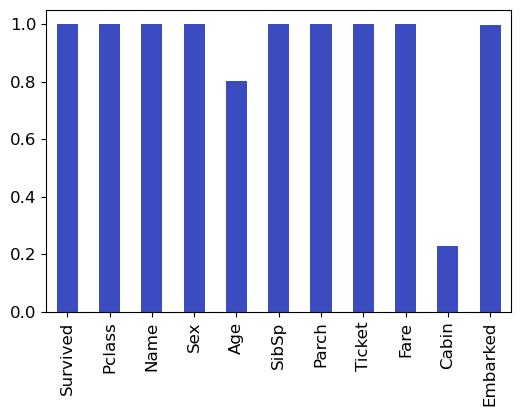

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=100)
(1 - tdf.isnull().mean()).plot.bar(ax=ax, colormap='coolwarm')

### MissingNo處理Nan

<AxesSubplot:>

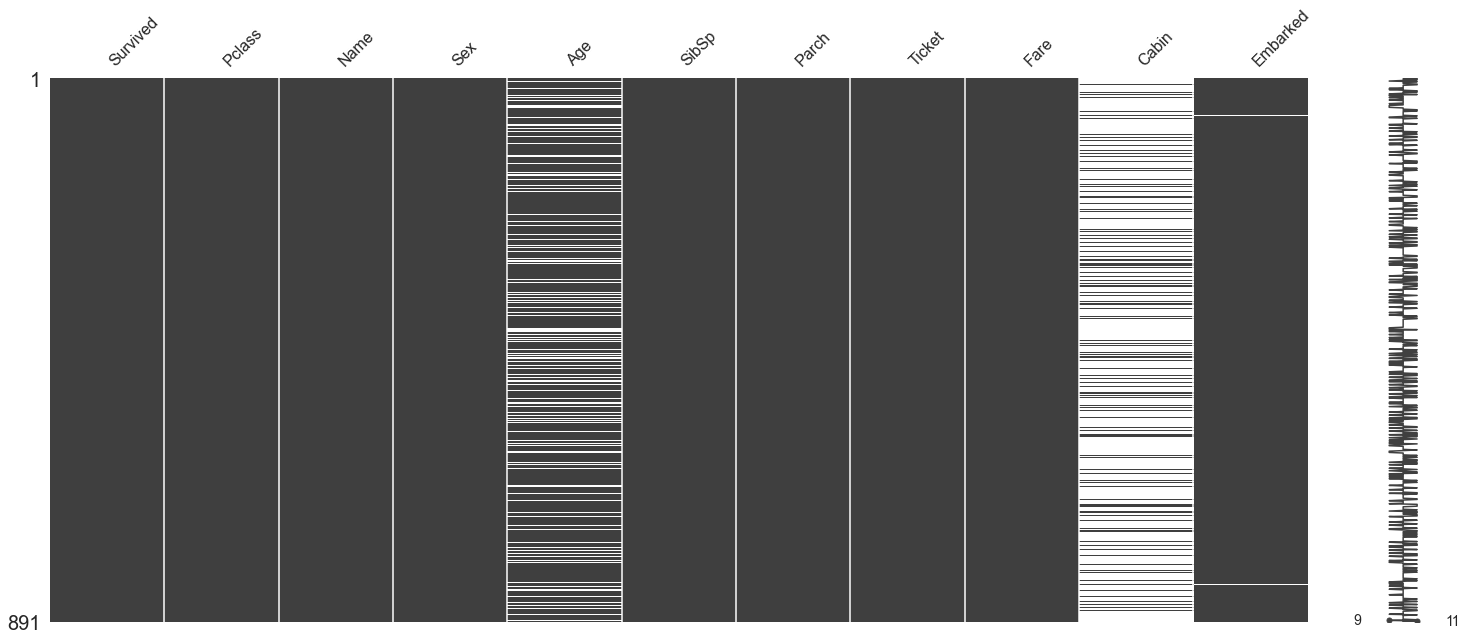

In [ ]:
import missingno as msno

msno.matrix(tdf)

<AxesSubplot:>

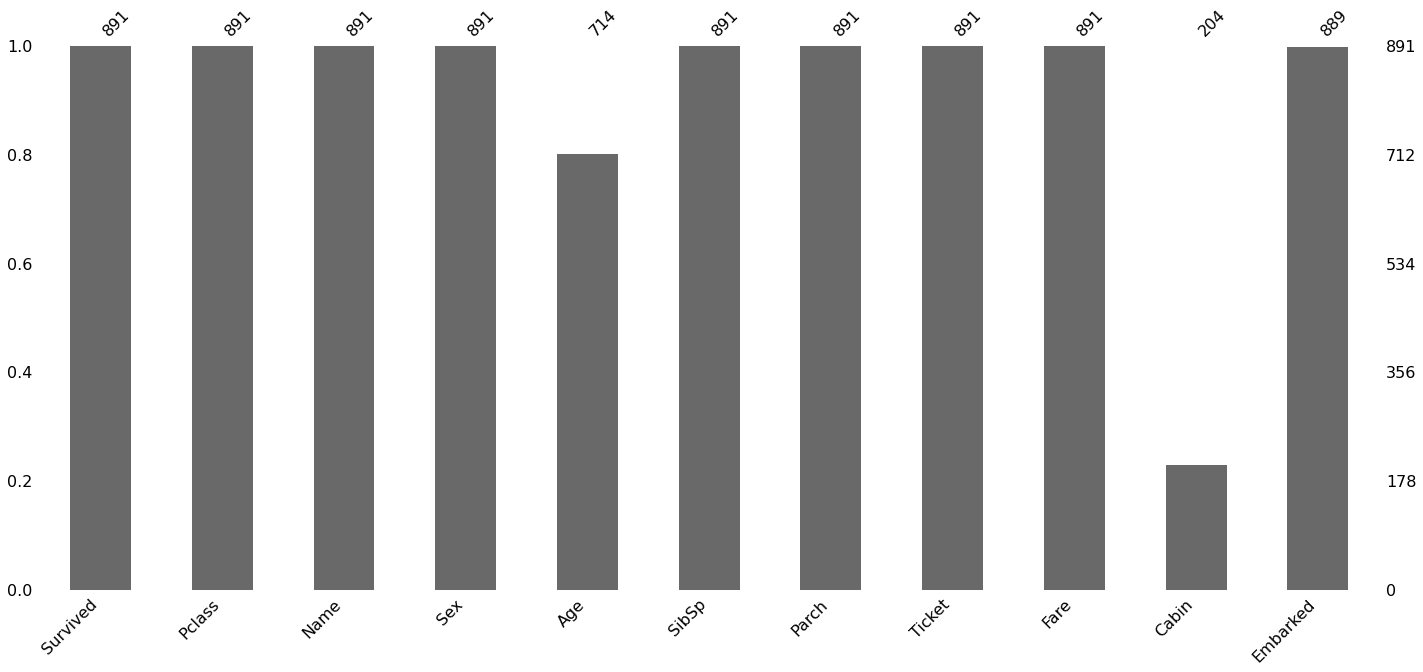

In [ ]:
msno.bar(tdf)

## 資料整體分佈

- [seaborn set](https://seaborn.pydata.org/generated/seaborn.set.html)
- [kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html?highlight=kdeplot#seaborn.kdeplot)
- [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot)
- [Pandas.DataFrame.hist](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html)
- [Shapiro-Wilk Test](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test)

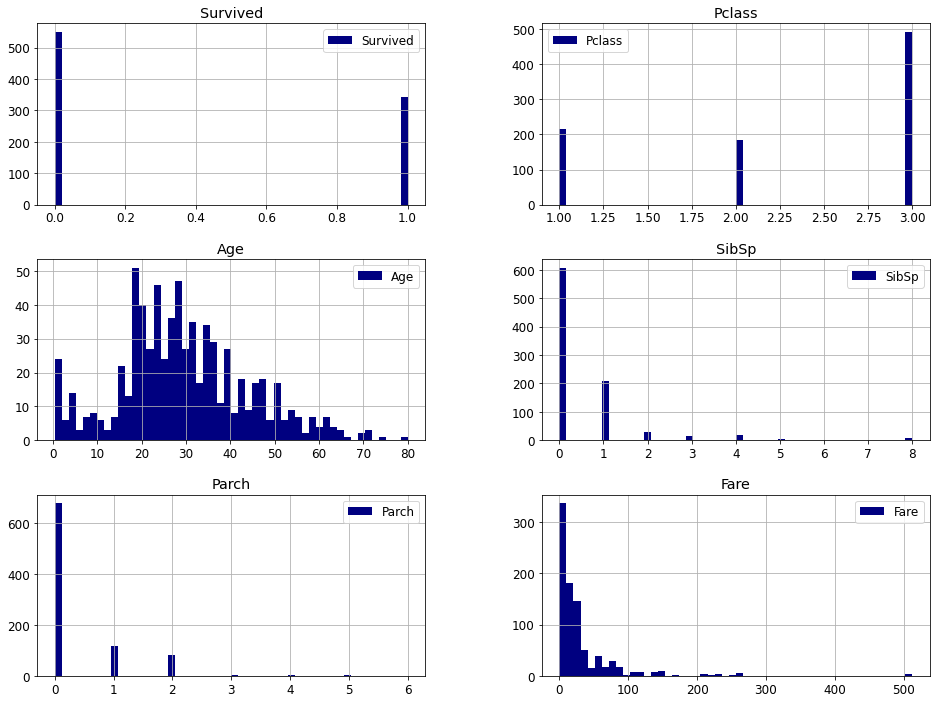

Wall time: 1.18 s


In [ ]:
%%time
ax = tdf.hist(bins=50, figsize=(16, 12), legend=True, color='navy')
plt.show()

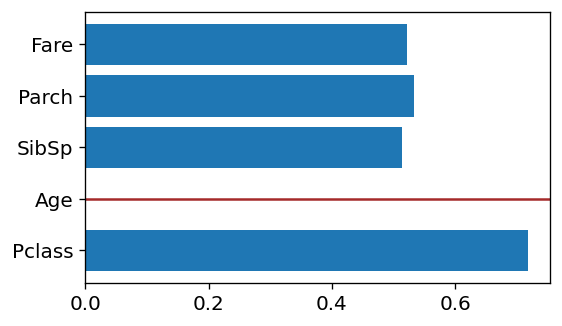

In [ ]:
import scipy.stats

fig, ax = plt.subplots(figsize=(5, 3), dpi=120)
X = tdf.drop(['Survived'], axis=1)
num_features = X.select_dtypes(include=np.number).columns.tolist()

stats = np.zeros((len(num_features), 2))

for i, e in enumerate(num_features):
    stats[i] = scipy.stats.shapiro(X[e])


ax.barh(num_features, stats[:, 0])

for i in range(len(num_features)):
    if stats[i, 1] > 0.005:
        ax.axhline(y=i, c='brown')

shapiro wilk test:

看出哪幾個欄位P-value > 0.005，也就是哪幾個欄位其分布"拒絕"常態分佈的假設

P-value < 0.005 拒絕normal distributoin 的 null hypothesis，也就是非normal distribution，也就是非normal distribution

<font color='yellow'>
Only "Age" is normal distribution
<font>

<AxesSubplot:xlabel='Age', ylabel='Density'>

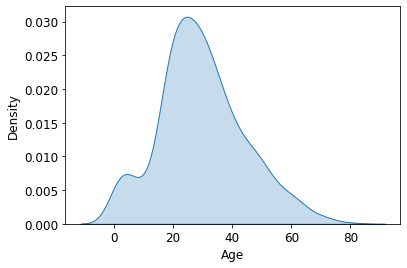

In [ ]:
sns.kdeplot(tdf.Age, shade=True)

C:\Users\wonglab\.conda\envs\Q\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wonglab\.conda\envs\Q\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

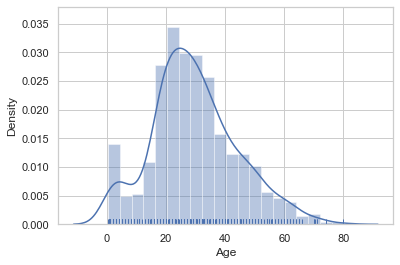

In [ ]:
sns.set(style='whitegrid', color_codes=True)
sns.distplot(tdf.Age, rug=True)

scatter plot / jointplot

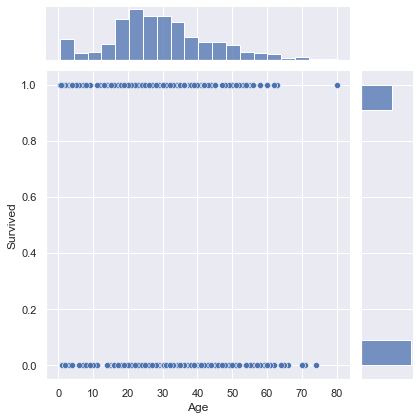

In [ ]:
sns.set()
sns.jointplot(x='Age', y='Survived', data=tdf)

C:\Users\wonglab\.conda\envs\Q\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Pclass', ylabel='count'>

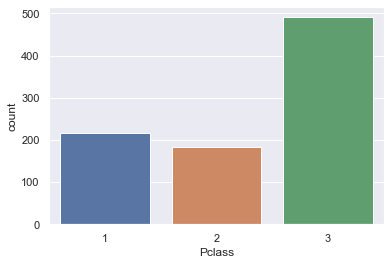

In [ ]:
sns.countplot(tdf.Pclass)

C:\Users\wonglab\.conda\envs\Q\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Survived', ylabel='count'>

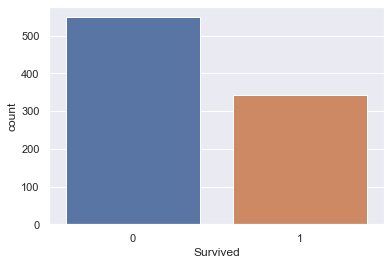

In [ ]:
sns.countplot(tdf.Survived)

## Correlation 關聯

C:\Users\wonglab\.conda\envs\Q\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


<AxesSubplot:>

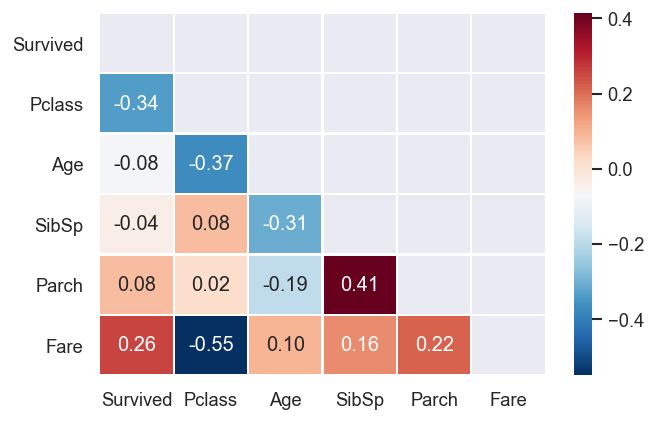

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=120)

corr = tdf.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool)) # triangular (half of the matrix)

sns.heatmap(tdf.corr(), annot=True, cmap='RdBu_r', mask=mask,
      fmt='.2f', linewidth=0.8, ax=ax)

Pclass = -0.34: 艙等數字越大，價錢越低

In [ ]:
corr = tdf.corr()
corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


當columns(features)太多，無法做correlation matrix太多，無法做correlation matrix

In [ ]:
cr = np.corrcoef(tdf.Survived, tdf.Fare)
cr

array([[1.        , 0.25730652],
       [0.25730652, 1.        ]])

求出各種關聯係數

In [ ]:
import scipy.stats

a = scipy.stats.kendalltau(tdf.Survived, tdf.Fare).correlation
b = scipy.stats.pearsonr(tdf.Survived, tdf.Fare)[0]
c = scipy.stats.spearmanr(tdf.Survived, tdf.Fare).correlation

a, b, c

(0.2662286416742869, 0.2573065223849624, 0.32373613944480834)

# 用 pandas-profiling 做基本調查


安裝 Pandas Profiling，需在終端機（Windows 環境則是命令列 CMD）輸入下列指令：

```
pip install -U pandas-profiling[notebook]
jupyter nbextension enable --py widgetsnbextension
```

參考資料：
- [Installation](https://pandas-profiling.github.io/pandas-profiling/docs/master/rtd/pages/installation.html)
- [Getting Started](https://pandas-profiling.github.io/pandas-profiling/docs/master/rtd/pages/getting_started.html)

In [ ]:
%%time
from pandas_profiling import ProfileReport

profile = ProfileReport(tdf, title='Titanic Analysis')

print('report generated')
print_now()
print(profile)

report generated
2021-06-14 20:28:45.782932

Wall time: 1.05 s


In [ ]:
profile

Output hidden; open in https://colab.research.google.com to view.

# Variables

In [ ]:
profile.to_file(data_dir, 'titanic_profile_demo.html')

C:\Users\wonglab\.conda\envs\Q\lib\site-packages\pandas_profiling\profile_report.py:267: UserWarning: Extension  not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  f"Extension {suffix} not supported. For now we assume .html was intended. "


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# 安裝 virtualenv

因為當工程師開發新套件時， 要做評估與測試。必須仰賴預先的套件，但此新套件對於預先套件的版本有需求和偏好，而在開發環境卻不存在，或是更新的版本。若把測試環境的套件與開發環境套件在同個環境下會拗成衝突。

<font color='yellow'>可將要測試或專門的套件，隔離在此虛擬環境裏頭<font>

```
pip3 install virtualenv
```

參考連結如下：

- [virtuelenv homepage](https://virtualenv.pypa.io/)
- [PyPI virtualenv](https://pypi.org/project/virtualenv/)
- [虛擬環境與套件（Python Documentation）](https://docs.python.org/zh-tw/3/tutorial/venv.html)
- [Python — Virtualenv虛擬環境安裝](https://medium.com/python4u/python-virtualenv%E8%99%9B%E6%93%AC%E7%92%B0%E5%A2%83%E5%AE%89%E8%A3%9D-9d6be2d45db9)
------

若需要安裝新的測試環境，在終端機命令列環境輸入以下指令：


```
virtualenv new_env
cd new_env
source bin/activate
```

退出測試環境，只要一行指令即可

```
deactivate
```

若要刪除整個環境，確定已經「退出」環境後，刪除整個目錄即可

### virtualenv 指令範例

在命令列環境裏面，執行下列指令，可安裝虛擬環境以及執行檔案分析工作（# 開頭的文字，表示這是說明，不需要執行）：

```
pip3 install virtualenv

#
# 回到 home 目錄
#
cd
pwd

#
# 建立虛擬工作環境 ptest
#
virtualenv ptest
cd ptest
source bin/activate

#
# 安裝 pandas-profiling
#
pip3 install pandas-profiling

#
# 假設 train.csv 已經下載到 ～/Downloada 目錄
#
bin/pandas_profiling ~/Downloads/train.csv ~/Downloads/test2020.html
```

# 自製分析工具

## bar_count

<AxesSubplot:xlabel='Parch', ylabel='Counts (#)'>

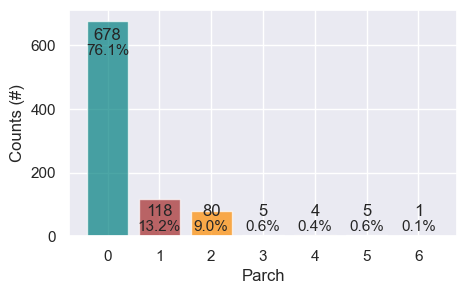

In [ ]:
colors = ['teal', 'brown', 'darkorange', 'lavender',  'sienna', 'azure', 'purple',
           'navy', 'lightblue', 'pink']

counts = lambda df, feature: df[feature].value_counts()

var_analysis = lambda df, feature, y: \
    df[[feature, y]].groupby(feature, as_index=False).mean().sort_values(by=y, ascending = False)

def bar_count(df, feature, figsize = (10, 10),
        dpi = 100, ax = None):
    if ax is None:
        fig, ax = plt.subplots(figsize = figsize, dpi = dpi)
    else:
        fig = ax.figure
    # k = df[feature].value_counts()
    k = df.groupby([feature]).size()
    q = 100*(k/len(df))

    ax.bar([str(e) for e in k.index] if type(k.index[0]) is np.int64 else k.index,
           k, color = colors, alpha = 0.7)
    # ticks將label變成整數

    for j, (i, p) in enumerate(zip(k.index, ax.patches)):
        # ypos = max(k[i] - 75, 25)
        ypos = max(p.get_height() - 60, 65)
        ax.text(j, ypos , '%d' % k[i], fontsize = 12, ha = 'center')
        ax.text(j, ypos - 48, '%.1f%%' % q[i], fontsize = 11,
            ha = 'center')

    ax.set_ylabel('Counts (#)')
    ax.set_xlabel(feature)
    return ax

sns.set(style='darkgrid')
bar_count(tdf, 'Parch', figsize = (5,3))


## bar_ratio

<AxesSubplot:xlabel='Pclass', ylabel='Survival Rate (%)'>

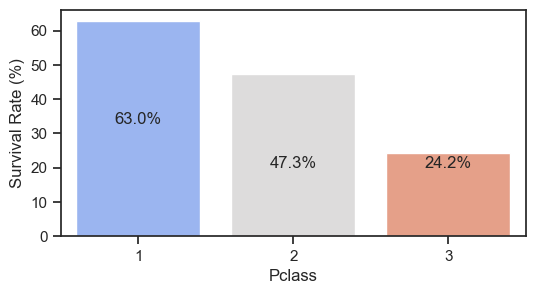

In [ ]:
def bar_ratio(df, feature, target = 'Survived', figsize = (6, 6),
        dpi = 100, ax = None):

    if ax is None:
        fig, ax = plt.subplots(figsize = figsize, dpi = dpi)
    else:
        fig = ax.figure

    a = tdf.groupby([feature]).agg(np.mean)[target]*100
    a = a.reset_index()
    sns.barplot(x = feature, y = target,
        data = a, ax = ax, palette='coolwarm')
    for j, (i, p) in enumerate(zip(a.index, ax.patches)):
        ypos = max(p.get_height() - 30, 20)
        ax.text(j, ypos , '%.1f%%' % a.loc[i]['Survived'],
            fontsize = 12,
            ha = 'center')

    ax.set_ylabel('Survival Rate (%)')
    ax.set_xlabel(feature)
    return ax

sns.set(style='ticks')
bar_ratio(tdf, 'Pclass', figsize = (6,3))

## var_corr

In [ ]:
def var_corr(df, feature, target):
    fig ,ax = plt.subplots(1, 3, figsize = (15, 5), dpi = 100)

    bar_count(tdf, feature, ax = ax[0])
#     sns.countplot(feature, data = df, palette = 'Blues',
#                 ax = ax[0])

    sns.countplot( x=  feature, hue = target , data = df,
        palette = 'Set1', ax = ax[1])

    sns.countplot( x=  target, hue = feature , data = df,
        palette = 'Set2', ax = ax[2])
    plt.tight_layout()

def var_corr2(df, feature, target):
    fig ,ax = plt.subplots(1, 3, figsize = (15, 5), dpi = 100)

    bar_count(tdf, feature, ax = ax[0])

    bar_ratio(df, feature, target, ax = ax[1])

    sns.countplot( x=  target, hue = feature , data = df,
        palette = 'Set2', ax = ax[2])
    plt.tight_layout()

# 欄位特性

## Count (個數)

In [ ]:
ratio = (tdf.Survived.value_counts() / len(tdf)).reset_index()
ratio = ratio.round(4)
ratio.rename(columns={'index': 'Survived', 'Survived': 'Ratio'}, inplace=True)
ratio

,Survived,Ratio
0,0,0.6162
1,1,0.3838


C:\Users\wonglab\.conda\envs\Q\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Survived', ylabel='Counts (#)'>

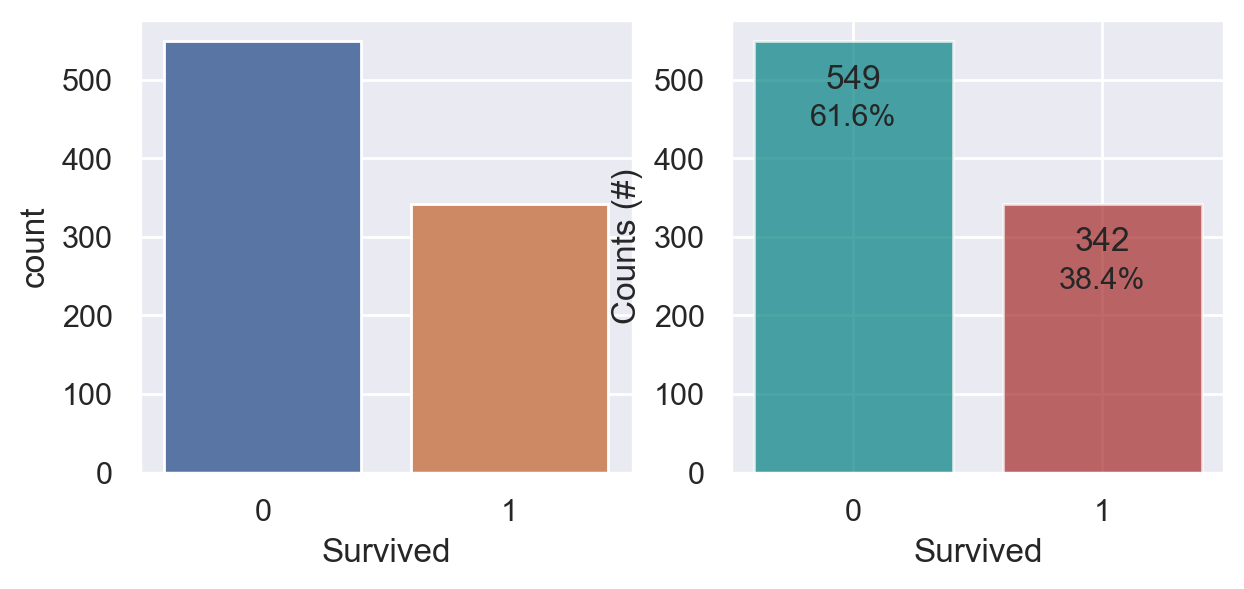

In [ ]:
fig,ax = plt.subplots(1, 2, figsize=(7, 3), dpi=200)
sns.countplot(tdf.Survived, ax=ax[0])
bar_count(tdf, 'Survived', ax=ax[1])

<AxesSubplot:xlabel='Sex', ylabel='Counts (#)'>

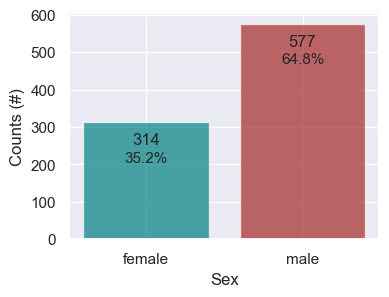

In [ ]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=100)
bar_count(tdf, 'Sex', ax=ax)

In [ ]:
tdf.groupby(['Sex', 'Survived']).size()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survival Rate (%)'>

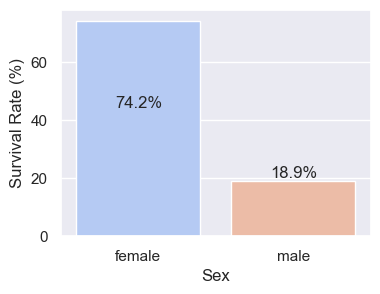

In [ ]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=100)
bar_ratio(tdf, 'Sex', ax=ax)

<AxesSubplot:xlabel='SibSp', ylabel='Survival Rate (%)'>

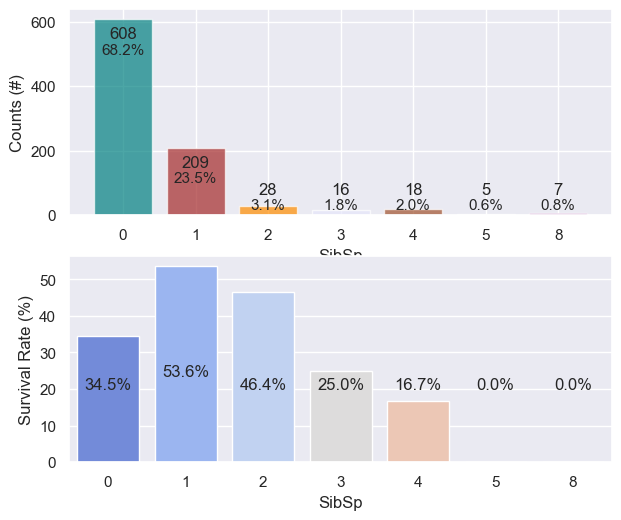

In [ ]:
sns.set()
feature = 'SibSp'
fig, ax = plt.subplots(2, 1, figsize=(7, 6), dpi=100)
bar_count(tdf, feature, ax=ax[0])
bar_ratio(tdf, feature, ax=ax[1])

<AxesSubplot:xlabel='Parch', ylabel='Survival Rate (%)'>

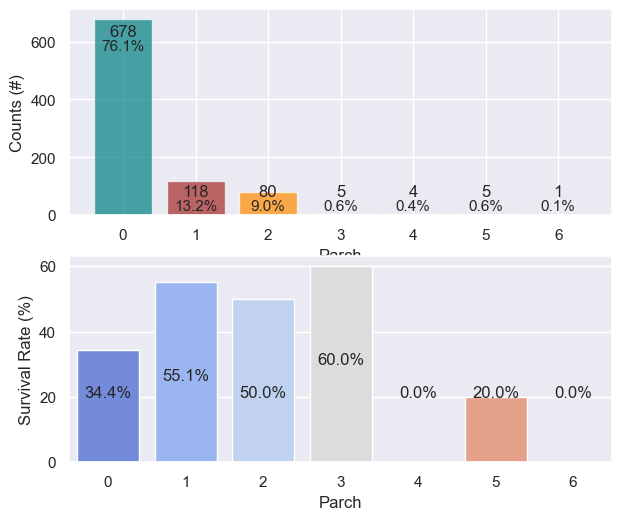

In [ ]:
sns.set()
feature = 'Parch'
fig, ax = plt.subplots(2, 1, figsize=(7, 6), dpi=100)
bar_count(tdf, feature, ax=ax[0])
bar_ratio(tdf, feature, ax=ax[1])

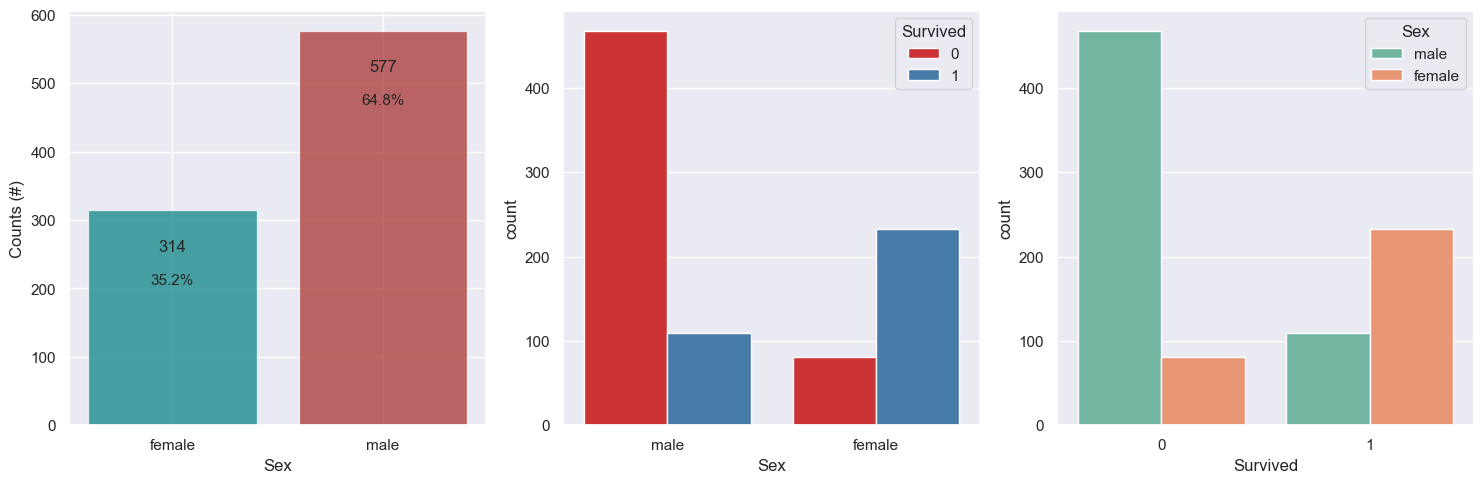

In [ ]:
var_corr(tdf, 'Sex', 'Survived')

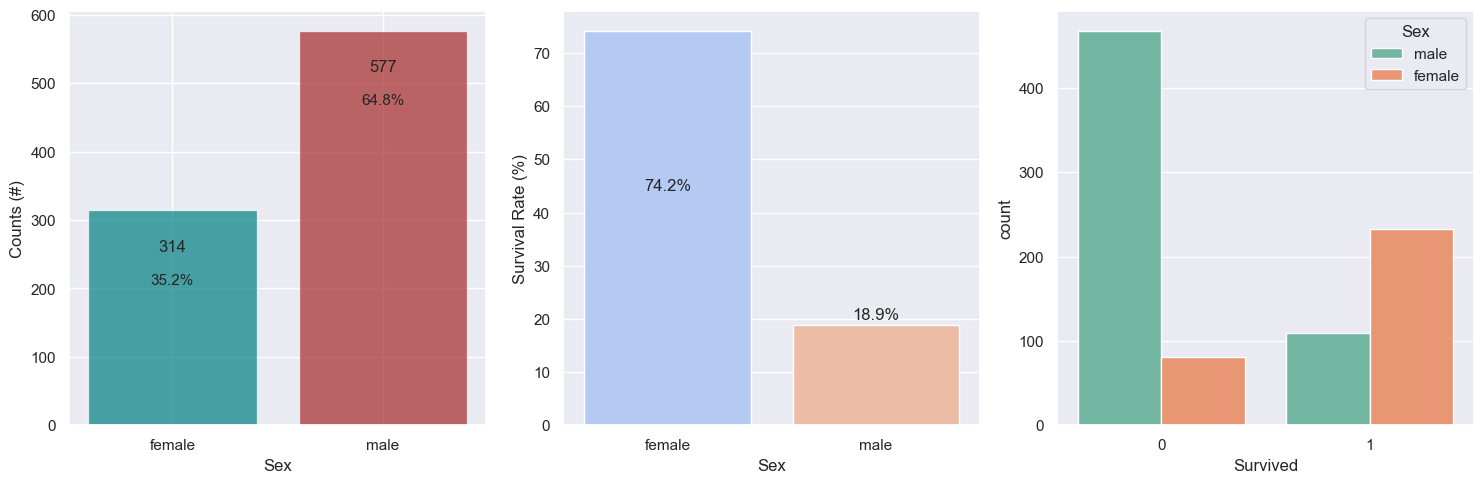

In [ ]:
var_corr2(tdf, 'Sex', 'Survived')

C:\Users\wonglab\.conda\envs\Q\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sex', ylabel='count'>

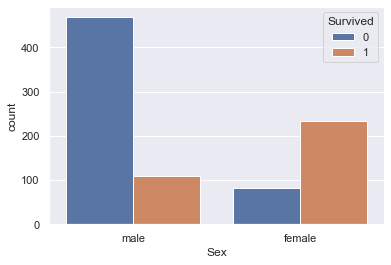

In [ ]:
sns.countplot('Sex', hue='Survived', data=tdf)

<AxesSubplot:xlabel='Pclass', ylabel='male'>

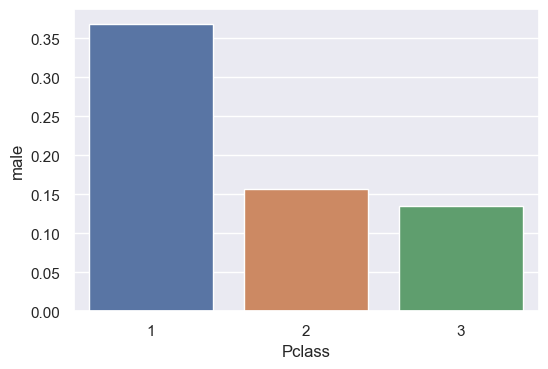

In [ ]:
a = tdf.groupby(['Sex', 'Pclass'])['Survived'].agg(np.mean)
d = pd.DataFrame(data={'female': a.loc['female'], 'male': a.loc['male']})
d = d.reset_index()
d.Pclass = d.Pclass.map(str)
ax = start_plot(figsize=(6, 4), style='darkgrid')
sns.barplot(x='Pclass', y='male', data=d, ax=ax)

## Distribution, Histogram

C:\Users\wonglab\.conda\envs\Q\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wonglab\.conda\envs\Q\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

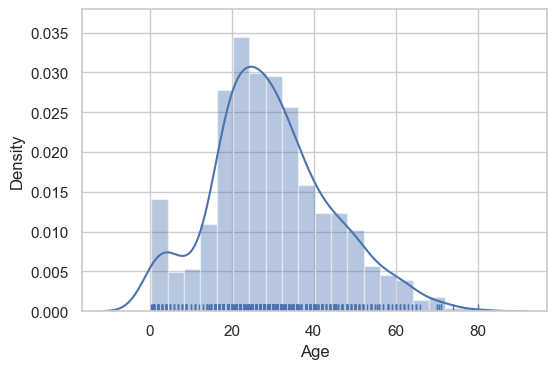

In [ ]:
ax = start_plot(figsize=(6, 4), style='whitegrid', dpi=100)
sns.distplot(tdf.Age, rug=True)

C:\Users\wonglab\.conda\envs\Q\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wonglab\.conda\envs\Q\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


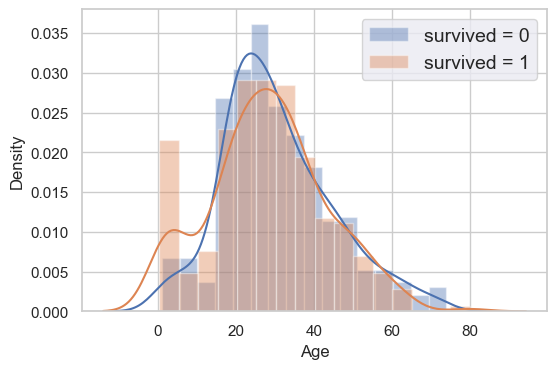

In [ ]:
ax = start_plot(figsize=(6, 4), style='whitegrid', dpi=100)
s0 = tdf[tdf['Survived'] == 0]
sns.distplot(s0['Age'], label='survived = 0')
s1 = tdf[tdf['Survived'] == 1]
sns.distplot(s1['Age'], label='survived = 1')
ax.legend(fontsize=14)

C:\Users\wonglab\.conda\envs\Q\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wonglab\.conda\envs\Q\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


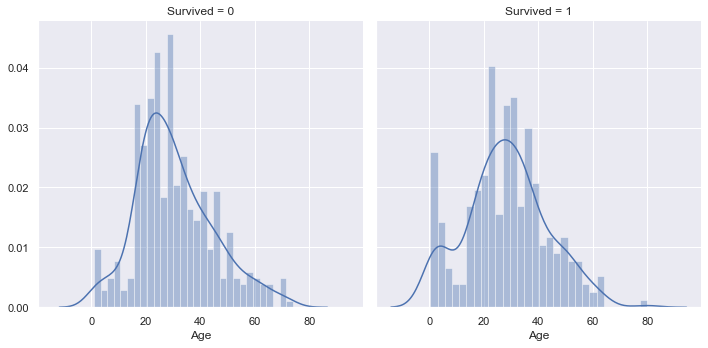

In [ ]:
g = sns.FacetGrid(tdf, col='Survived', height=5)
g.map(sns.distplot, 'Age', bins=30)
plt.show()

## Seaborn Boxplot

- [Start Here:Titanic Project From Beginner to Expert](https://www.kaggle.com/muhammetcakmak/start-here-titanic-project-from-beginner-to-expert/notebook)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

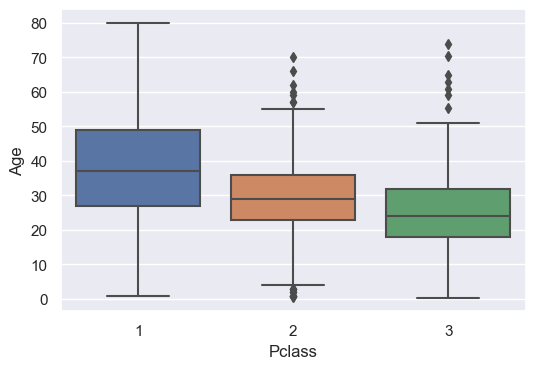

In [ ]:
ax = start_plot(figsize=(6, 4), style='darkgrid', dpi=100)
sns.boxplot(x='Pclass', y='Age', data=tdf, ax=ax)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

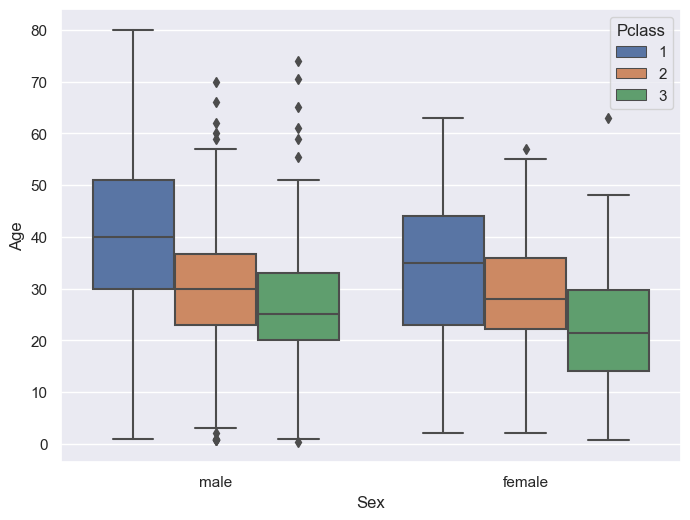

In [ ]:
ax = start_plot(figsize=(8, 6), style='darkgrid', dpi=100)
sns.boxplot(x='Sex', y='Age', hue='Pclass', data=tdf, ax=ax)

<AxesSubplot:xlabel='Parch', ylabel='Age'>

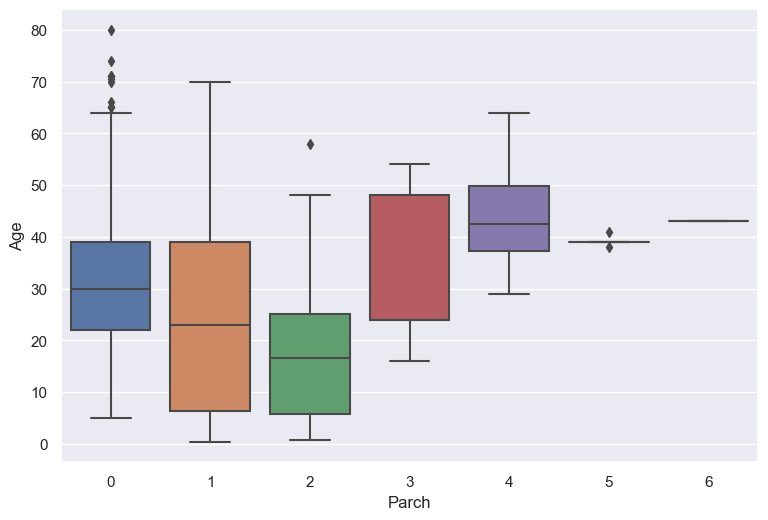

In [ ]:
ax = start_plot(figsize=(9, 6), style='darkgrid', dpi=100)

sns.boxplot(x='Parch', y='Age', data=tdf)

## jointplot

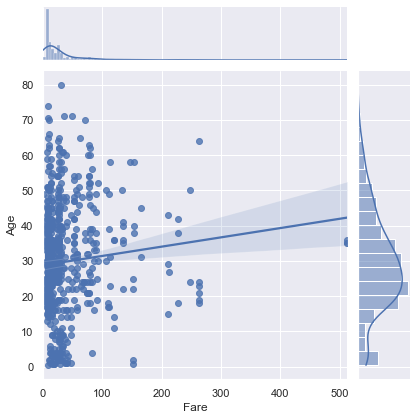

In [ ]:
sns.set()
sns.jointplot(x='Fare', y='Age', kind='reg', height=6, data=tdf)

# 特徵工程 Feature Engineering

## 增加哪些欄位是合理的？

In [ ]:
tdf.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

regular expression

In [ ]:
X_name = tdf[['Name']]
X_name['Title'] = X_name.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
X_name['Title2'] = X_name.Name.str.extract('([A-Za-z]+)\.')
X_name

C:\Users\wonglab\.conda\envs\Q\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\wonglab\.conda\envs\Q\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Name,Title,Title2
0,"Braund, Mr. Owen Harris",Mr,Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs,Mrs
2,"Heikkinen, Miss. Laina",Miss,Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs,Mrs
4,"Allen, Mr. William Henry",Mr,Mr
...,...,...,...
886,"Montvila, Rev. Juozas",Rev,Rev
887,"Graham, Miss. Margaret Edith",Miss,Miss
888,"Johnston, Miss. Catherine Helen ""Carrie""",Miss,Miss
889,"Behr, Mr. Karl Howell",Mr,Mr


In [ ]:
X_name.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [ ]:
X_name.Title2.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

### 姓名與頭銜

In [ ]:
# normalize the titles
normalized_titles = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"
}
# map the normalized titles to the current titles
tdf['Title'] = X_name['Title'].map(normalized_titles)

In [ ]:
tdf.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Royalty', 'Officer'], dtype=object)

### 同行人數

* `Sibsp`: # of siblings / spouses aboard the Titanic     
* `Sarch`: # of parents / children aboard the Titanic     

* `Parch` : defines family relations such as mother, father,daughter, son, stepdaughter, stepson (Some children travelled only with a nanny, therefore parch=0 for them.)    


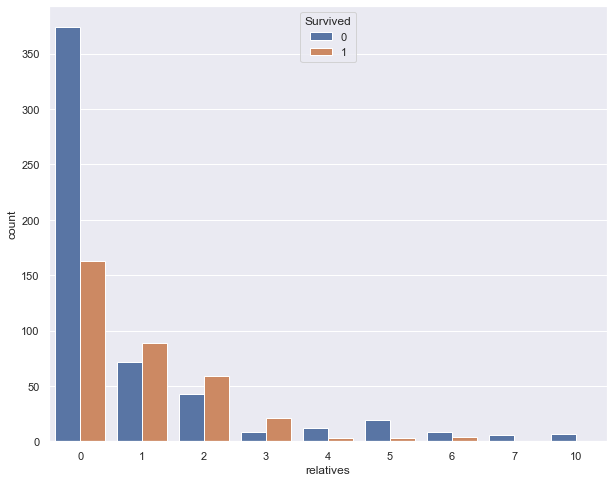

In [ ]:
tdf['relatives'] = tdf['SibSp'] + tdf['Parch']
fig, ax = plt.subplots(figsize=(10, 8))
sns.countplot(x='relatives', hue='Survived', data=tdf, ax=ax)
plt.show()

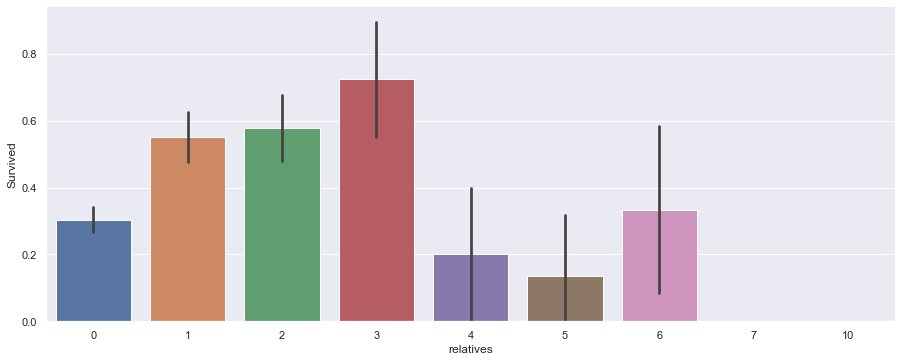

In [ ]:
##比例
##同行人數為3時，生還比例最大
axes = sns.catplot(x='relatives', y='Survived',
                   data=tdf, legend=True, kind='bar', aspect=2.5)

C:\Users\wonglab\.conda\envs\Q\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='alone', ylabel='count'>

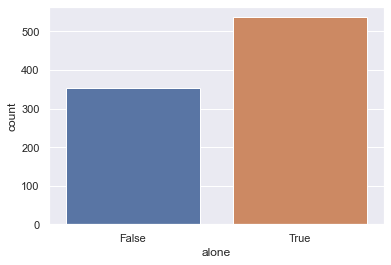

In [ ]:
## 觀看Alone: 同行人數為0
tdf['alone'] = (tdf['relatives'] == 0)
sns.countplot(tdf['alone'])

<AxesSubplot:xlabel='alone', ylabel='count'>

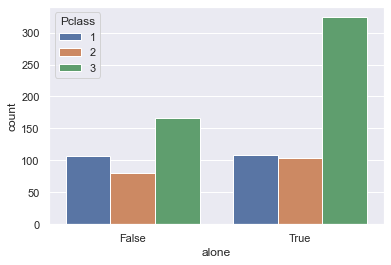

In [ ]:
#頭等艙為alone的比例較高
sns.countplot(x='alone', hue='Pclass', data=tdf)

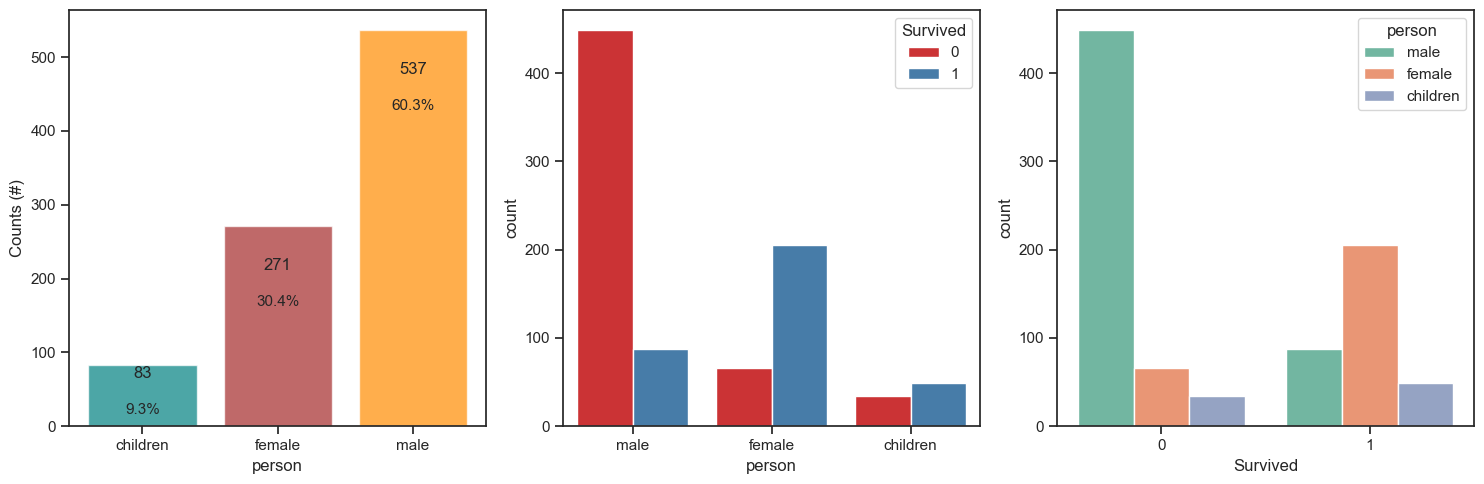

In [ ]:
#觀察此人為大人還小孩

def person_info(passenger):
    age, sex = passenger
    if (age < 16):
        return 'children'
    else:
        return sex

tdf['person'] = tdf[['Age', 'Sex']].apply(person_info, axis=1)
var_corr(tdf, 'person', 'Survived')

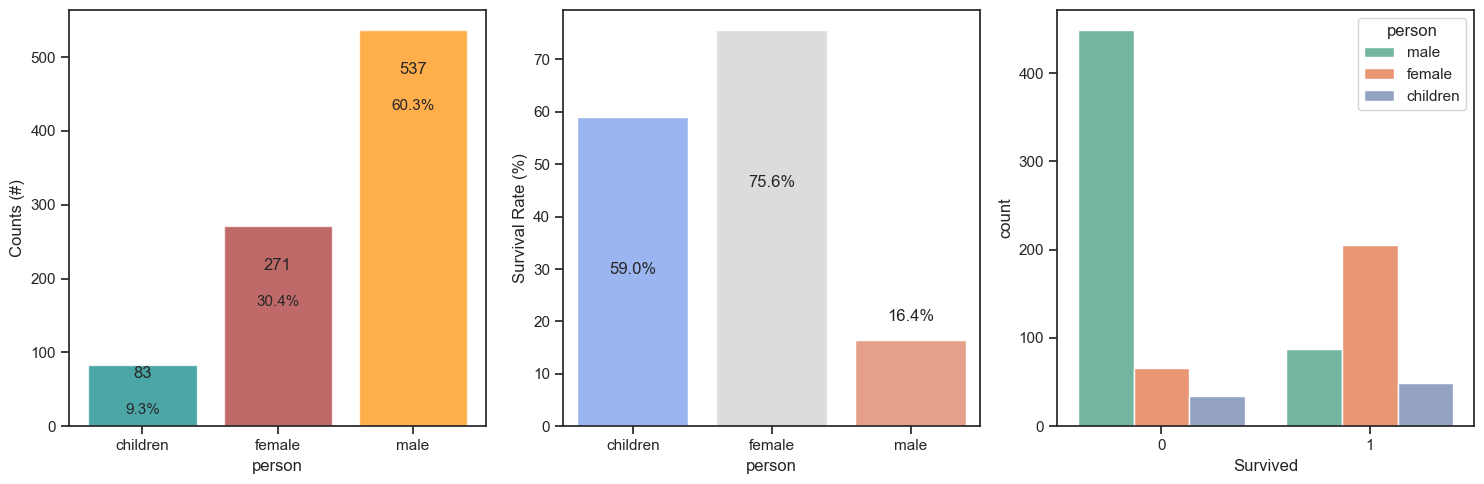

In [ ]:
var_corr2(tdf, 'person', 'Survived')

## 缺失值（missing values）如何處理

- Deleging records
- Dropping variables
- Replacing with zero/ last known values/ mean/ median/ mode/ specific constant
- Interpolation
- Predicting the value with specific algorithm


In [ ]:
tdf.isnull().sum()

Survived          0
Pclass            0
Name              0
Sex               0
Age             177
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          2
Title             0
relationship      0
relatives         0
alone             0
person            0
dtype: int64

In [ ]:
##將有缺失值得rows組成新的DATAFRAME
incomplete_rows = lambda df: df[df.isnull().any(axis=1)]
qdf = incomplete_rows(tdf)
qdf

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,relationship,relatives,alone,person
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1,False,male
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,0,True,female
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0,0,True,male
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr,0,0,True,male
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master,4,4,False,children
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,Mr,0,0,True,male
885,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,Mrs,5,5,False,female
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Officer,0,0,True,male
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,3,3,False,female


### 最簡單的做法

In [ ]:
## mode
## This is 'Series', so we should take the index=0 value
tdf.Embarked.value_counts().index[0], tdf.Embarked.mode()[0]

('S', 'S')

In [ ]:
tdf2 = tdf.copy()
tdf2.drop('Cabin', axis=1, inplace=True)
tdf2['Age'] = tdf2.Age.fillna(tdf['Age'].mean())
most_embarked = tdf2.Embarked.mode()[0]
tdf2['Embarked'] = tdf2['Embarked'].fillna(most_embarked)

In [ ]:
tdf2.isnull().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
Title           0
relationship    0
relatives       0
alone           0
person          0
dtype: int64

### 複雜版

In [ ]:
tdf2 = tdf.copy()

In [ ]:
tdf2.Age.mean(), tdf2.Age.std()

(29.69911764705882, 14.526497332334044)

In [ ]:
##此做法為將mean +- std 當作區間隨機取一數
mean = tdf2['Age'].mean()
std = tdf2['Age'].std()
is_null = tdf2["Age"].isnull().sum()
rand_age = np.random.randint(mean-std, mean+std, size = is_null)
age_slice = tdf2["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
tdf2['Age'] = age_slice

In [ ]:
tdf2.Age.mean(), tdf2.Age.std()

(29.587171717171714, 13.533911792099222)

C:\Users\wonglab\.conda\envs\Q\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

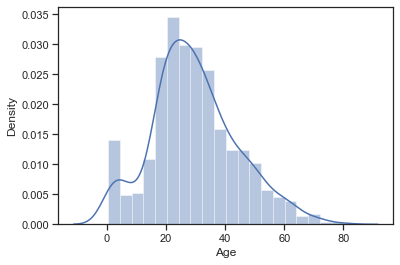

In [ ]:
sns.distplot(tdf.Age)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

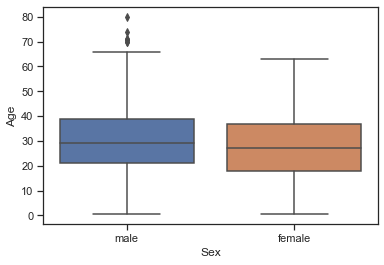

In [ ]:
sns.boxplot(x='Sex', y='Age', data=tdf)

<AxesSubplot:xlabel='SibSp', ylabel='Age'>

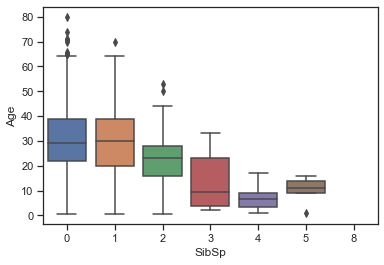

In [ ]:
sns.boxplot(x='SibSp', y='Age', data=tdf)

<AxesSubplot:xlabel='Parch', ylabel='Age'>

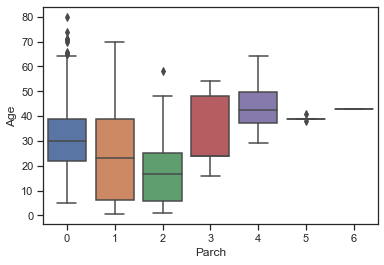

In [ ]:
sns.boxplot(x='Parch', y='Age', data=tdf)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

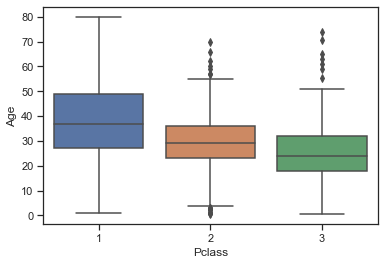

In [ ]:
sns.boxplot(x='Pclass', y='Age', data=tdf)

In [ ]:
t2 = tdf.copy()
grouped = t2.groupby(['SibSp', 'Pclass', 'Parch'])

In [ ]:
grouped.Age.mean()

SibSp  Pclass  Parch
0      1       0        41.005814
               1        37.166667
               2        25.777778
       2       0        33.736559
               1        26.875000
               2        16.041250
       3       0        28.235556
               1        18.947273
               2        20.611111
               3        24.000000
               4        29.000000
               5        40.000000
1      1       0        37.200000
               1        47.416667
               2        17.845714
               4        64.000000
       2       0        31.711538
               1        21.525000
               2        24.500000
               3        54.000000
       3       0        24.919355
               1        21.000000
               2        13.500000
               3        32.000000
               4        42.500000
               5        38.666667
               6        43.000000
2      1       0        49.000000
               2        19.

In [ ]:
t2.Age = grouped.Age.apply(lambda x: x.fillna(x.median()))

In [ ]:
t2.isnull().sum()
## 發現問題: Age經過fillna還是有Nan，因為SibSp的groupby發現SibSp為8的mean值為零
##，代表SibSp的Age全為NAN

Survived          0
Pclass            0
Name              0
Sex               0
Age               7
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          2
Title             0
relationship      0
relatives         0
alone             0
person            0
dtype: int64

In [ ]:
t2[t2['SibSp'] == 8]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,relationship,relatives,alone,person
159,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S,Master,10,10,False,male
180,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,Miss,10,10,False,female
201,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S,Mr,10,10,False,male
324,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S,Mr,10,10,False,male
792,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S,Miss,10,10,False,female
846,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S,Mr,10,10,False,male
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S,Miss,10,10,False,female


## Categorical Encoding

### label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X_cat = np.array(['red', 'white', 'blue', 'purple', 'yellow', 'red'])
X_tfed = le.fit_transform(X_cat)
X_tfed

array([2, 3, 0, 1, 4, 2], dtype=int64)

### frequency encoding, target, count

In [ ]:
X_exp = tdf[['Sex']]
masking = X_exp.Sex.value_counts()
X_exp['Sex2'] = X_exp.Sex.map(masking)

C:\Users\wonglab\.conda\envs\Q\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
X_exp

,Sex,Sex2
0,male,577
1,female,314
2,female,314
3,female,314
4,male,577
...,...,...
886,male,577
887,female,314
888,female,314
889,male,577


### Python Class: Category Encoder

- [Category Encoder](http://contrib.scikit-learn.org/category_encoders/)

# one-stop shopping

- [Kaggle Titanic](https://www.kaggle.com/c/titanic/data)

In [ ]:
train_csv = os.path.join(data_dir, 'train.csv')
test_csv = os.path.join(data_dir, 'test.csv')

train_df = pd.read_csv(train_csv)
test_df = pd.read_csv(test_csv)


In [ ]:
display(train_df.isnull().sum())
display(test_df.isnull().sum()) #發現test的Fare有缺失值

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
tdf = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)

In [ ]:
split_point = len(train_df) #切割點

In [ ]:
tdf.shape, train_df.shape, test_df.shape

((1309, 12), (891, 12), (418, 11))

## Simple Version

In [ ]:
%%time

train_csv = os.path.join(data_dir, 'train.csv')
test_csv = os.path.join(data_dir, 'test.csv')

train_df = pd.read_csv(train_csv)
test_df = pd.read_csv(test_csv)
split_point = len(train_df)

tdf = pd.concat([train_df, test_df], axis = 0).reset_index(drop = True)

#
# covert male/female to 1/0
#
tdf.Sex = tdf.Sex.map({"male": 0, "female":1})

#
# Dealing with 'missing values'
#
most_embarked = tdf.Embarked.mode()[0]
tdf.Embarked = tdf.Embarked.fillna(most_embarked)
tdf['Age'] = tdf['Age'].fillna(tdf['Age'].mean())
tdf['Fare'] = tdf.Fare.fillna(tdf.Fare.median())

#
# one hot encoding
#
tdf_simple = pd.get_dummies(tdf, prefix_sep='_',
    columns = ['Pclass', 'Embarked'])

#
# drop irrelevant features
#
tdf_simple.drop(['PassengerId', 'Ticket', 'Cabin', 'Name'], axis = 1,
    inplace = True)

# tdf_simple.to_csv(os.path.join(data_dir, 'simple_train.csv'), index=False)

Wall time: 21 ms


In [ ]:
display(tdf_simple.head())
tdf_simple.shape

,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0,22.0,1,0,7.2500,0,0,1,0,0,1
1,1.0,1,38.0,1,0,71.2833,1,0,0,1,0,0
2,1.0,1,26.0,0,0,7.9250,0,0,1,0,0,1
3,1.0,1,35.0,1,0,53.1000,1,0,0,0,0,1
4,0.0,0,35.0,0,0,8.0500,0,0,1,0,0,1


(1309, 12)

In [ ]:
simple_train = tdf_simple[:split_point]
simple_test = tdf_simple[split_point:]
simple_train = simple_train.astype({'Survived':int})
simple_test.drop(['Survived'], axis = 1, inplace = True)

#將做完特徵工程存成另個檔案
simple_train.to_csv(os.path.join(data_dir, 'simple_train.csv'), index=False)
simple_test.to_csv(os.path.join(data_dir, 'simple_test.csv'), index=False)

C:\Users\wonglab\.conda\envs\Q\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
display(simple_train.head())
display(simple_test.head())
simple_train.shape, simple_test.shape

,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,0,22.0,1,0,7.2500,0,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,1,0,0
2,1,1,26.0,0,0,7.9250,0,0,1,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,0,1
4,0,0,35.0,0,0,8.0500,0,0,1,0,0,1


,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
891,0,34.5,0,0,7.8292,0,0,1,0,1,0
892,1,47.0,1,0,7.0000,0,0,1,0,0,1
893,0,62.0,0,0,9.6875,0,1,0,0,1,0
894,0,27.0,0,0,8.6625,0,0,1,0,0,1
895,1,22.0,1,1,12.2875,0,0,1,0,0,1


((891, 12), (418, 11))

## Complete version


1. 將 Sex 欄位轉換為 0 / 1
1. 增加 Title 欄位 (from "name")
1. 增加 relative 欄位
1. 處理缺失數值
    - Embarked
    - Age
    - Fare

1. One Hot Encoding
1. 標準化(Standardization)數字型欄位
1. 捨棄 'PassengerId', 'Ticket', 'Cabin', 'Name'

### here we go

In [ ]:
%%time

from sklearn.preprocessing import MinMaxScaler, StandardScaler

train_csv = os.path.join(data_dir, 'train.csv')
test_csv = os.path.join(data_dir, 'test.csv')

train_df = pd.read_csv(train_csv)
test_df = pd.read_csv(test_csv)

tdf = pd.concat([train_df, test_df], axis = 0).reset_index(drop = True)
split_point = len(train_df)

#
# convert Sex to integer-coded
#
tdf.Sex = tdf.Sex.map({"male": 0, "female":1})

# create a new feature to extract title names from
# the Name column
tdf['Title'] = tdf.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())

#
# normalize the titles
#
normalized_titles = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"
}
# map the normalized titles to the current titles
tdf.Title = tdf.Title.map(normalized_titles)

tdf['relatives'] = tdf['SibSp'] + tdf['Parch']

#
# Dealing with 'missing values'
#
most_embarked = tdf.Embarked.mode()[0]
tdf.Embarked = tdf.Embarked.fillna('C')

# returned value of pandas.groupby is a GroupBy object
# that contains information about the groups
grouped = tdf.groupby(['Sex', 'Pclass', 'Title'])

# apply the grouped median value on the Age NaN
tdf.Age = grouped.Age.apply(lambda x: x.fillna(x.median()))

grouped = tdf.groupby('Pclass')
tdf['Fare'] = grouped.Fare.apply(lambda x: x.fillna(x.median()))

#
# drop irrelevant features
#
tdf.drop(['PassengerId', 'Ticket', 'Cabin', 'Name'], axis = 1,
    inplace = True)

cat_features = tdf.select_dtypes(include=['object']).columns.tolist()
num_features = \
    tdf.select_dtypes(include= np.number).columns.tolist()
num_features.remove('Sex')
num_features.remove('Survived')
# print(num_features)
se = StandardScaler()
tdf[num_features] = se.fit_transform(tdf[num_features])

tdf_ohe = pd.get_dummies(tdf, prefix_sep='_',
    columns = cat_features)

print('DataFrame is ready for future')
print_now()

DataFrame is ready for future
2021-06-16 21:21:07.716566
Wall time: 45.9 ms


### Split train, test

In [ ]:
my_train = tdf_ohe[:split_point]
my_test = tdf_ohe[split_point:]
my_train = my_train.astype({'Survived':int})
my_test.drop(['Survived'], axis = 1, inplace = True)
display(my_train.head())

C:\Users\wonglab\.conda\envs\Q\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,relatives,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,0,0.841916,0,-0.541471,0.481288,-0.445,-0.503176,0.073352,0,0,1,0,0,1,0,0,0
1,1,-1.546098,1,0.648868,0.481288,-0.445,0.734809,0.073352,1,0,0,0,0,0,1,0,0
2,1,0.841916,1,-0.243886,-0.479087,-0.445,-0.490126,-0.558346,0,0,1,0,1,0,0,0,0
3,1,-1.546098,1,0.425680,0.481288,-0.445,0.383263,0.073352,0,0,1,0,0,0,1,0,0
4,0,0.841916,0,0.425680,-0.479087,-0.445,-0.487709,-0.558346,0,0,1,0,0,1,0,0,0


In [ ]:
my_train.to_csv( os.path.join(data_dir, 'my_train.csv'), index = False)
my_test.to_csv( os.path.join(data_dir, 'my_test.csv'), index = False)
print_now()

2021-06-16 21:21:48.147245


# SVC

In [ ]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold

df = pd.read_csv(os.path.join(data_dir, 'my_train.csv'))
df2 = pd.read_csv(os.path.join(data_dir, 'simple_train.csv'))

y = df.Survived
X = df.drop(['Survived'], axis = 1)

y2 = df2.Survived
X2 = df2.drop(['Survived'], axis = 1)

model = SVC()
model.fit(X.values, y)
print(model.score(X, y))

model = SVC()
model.fit(X2.values, y2)
print(model.score(X2, y2))

0.8406285072951739
0.6857463524130191
Wall time: 490 ms


# 來看看效果吧

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier


models = [
    SVC(),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    LGBMClassifier(),
    LogisticRegression(max_iter=1000)
]

titles = ['SVC', 'RF', 'DT', 'kNN',
    'AdaBoost','GB', 'LightGBM', 'LR']

In [ ]:
%%time

from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt

# evaluate each model in turn
# results = []
# names = []
# scores = []
seed = 7
scoring = 'accuracy'

df = pd.read_csv(os.path.join(data_dir, 'my_train.csv'))
df2 = pd.read_csv(os.path.join(data_dir, 'simple_train.csv'))

y_train = df.Survived
X_train = df.drop(['Survived'], axis = 1)

y_simple = df2.Survived
X_simple = df2.drop(['Survived'], axis = 1)

kfold = KFold(n_splits=5, random_state=seed, shuffle=True)
model_comp = pd.DataFrame()
model_simple = pd.DataFrame()

for i, model in enumerate(models):
    # kfold = StratifiedKFold(n_splits=5, random_state=0, shuffle=False)
    scores = cross_val_score(model, X_train, y_train,
        cv=kfold, scoring=scoring)

    model_comp[titles[i]] = scores
    msg = "complex: %s: %f (%f)" % (titles[i], scores.mean(), scores.std())
    print(msg)
    scores = cross_val_score(model, X_simple, y_simple,
        cv=kfold, scoring=scoring)

    model_simple[titles[i]] = scores
    msg = "simple: %s: %f (%f)" % (titles[i], scores.mean(), scores.std())
    print(msg)


complex: SVC: 0.829471 (0.040386)
simple: SVC: 0.673360 (0.044270)
complex: RF: 0.809252 (0.038784)
simple: RF: 0.799127 (0.040742)
complex: DT: 0.792411 (0.029792)
simple: DT: 0.777823 (0.030083)
complex: kNN: 0.804764 (0.037846)
simple: kNN: 0.711556 (0.052791)
complex: AdaBoost: 0.815981 (0.041101)
simple: AdaBoost: 0.802517 (0.036848)
complex: GB: 0.826069 (0.029941)
simple: GB: 0.822704 (0.030462)
complex: LightGBM: 0.829408 (0.030046)
simple: LightGBM: 0.826044 (0.032338)
complex: LR: 0.832823 (0.039674)
simple: LR: 0.794652 (0.034829)
Wall time: 5.21 s


Text(0.5, 1.0, 'Simple')

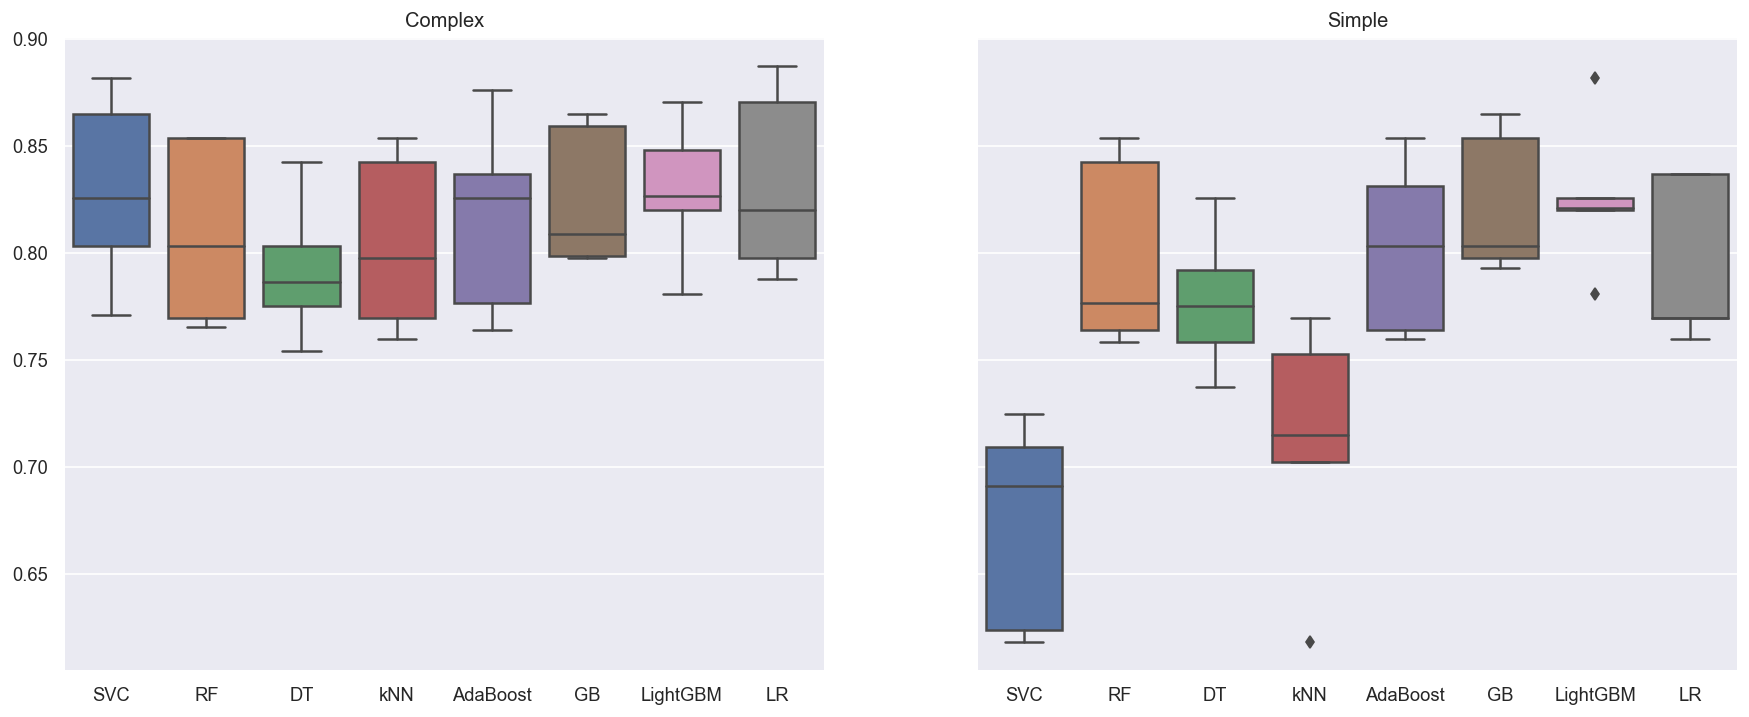

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (18, 7), sharey=True, dpi = 120)
sns.boxplot(data = model_comp, ax = ax[0])
ax[0].set_title('Complex')
sns.boxplot(data = model_simple, ax = ax[1])
ax[1].set_title('Simple')
# output_fig('model comparison')

<AxesSubplot:>

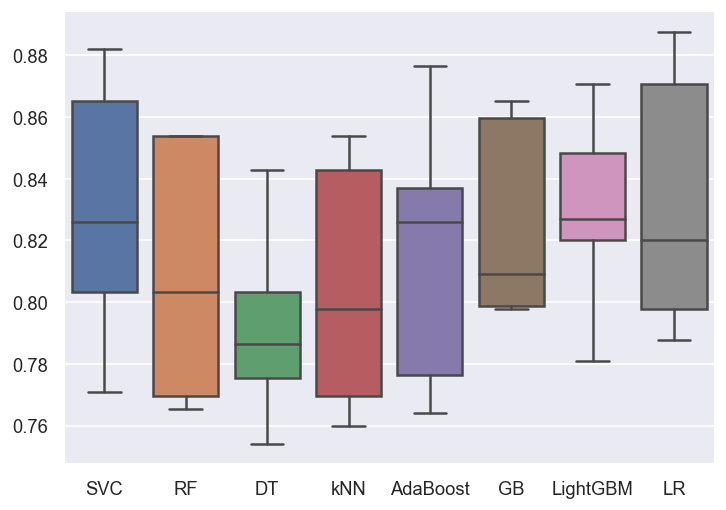

In [ ]:
fig,ax = plt.subplots(figsize=(7,5), dpi = 120)
sns.boxplot(data = model_comp)

<AxesSubplot:>

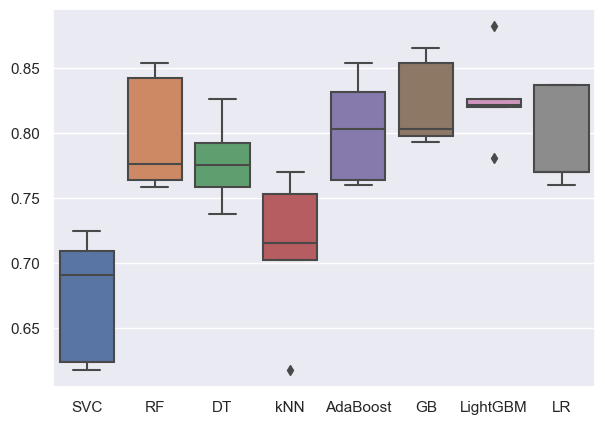

In [ ]:
fig,ax = plt.subplots(figsize=(7,5), dpi = 100)
sns.boxplot(data = model_simple)

# ClassificationError

- Precision= $\frac{TP}{TP+FP}$

- Recall = $\frac{TP}{TP+FN}$

- F1 = $2 \cdot \frac {P \times R}{P+R}$

In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_roc_curve

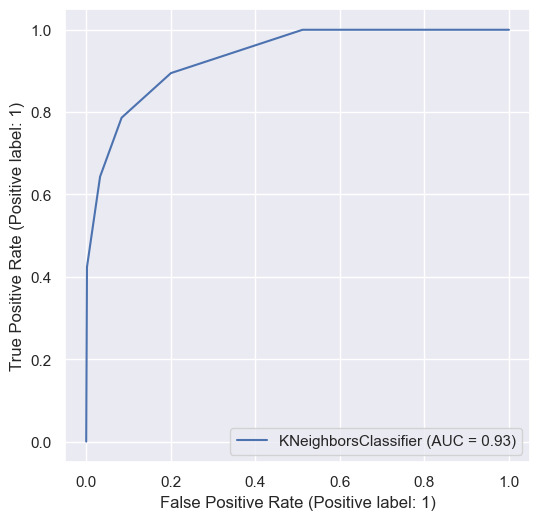

In [ ]:
df = pd.read_csv(os.path.join(data_dir, 'my_train.csv'))
X = df.drop(['Survived'], axis = 1)
y = df.Survived

model = KNeighborsClassifier()

fig,ax = plt.subplots(figsize=(6, 6), dpi=100)
model.fit(X, y)
plot_roc_curve(model, X, y, ax=ax)


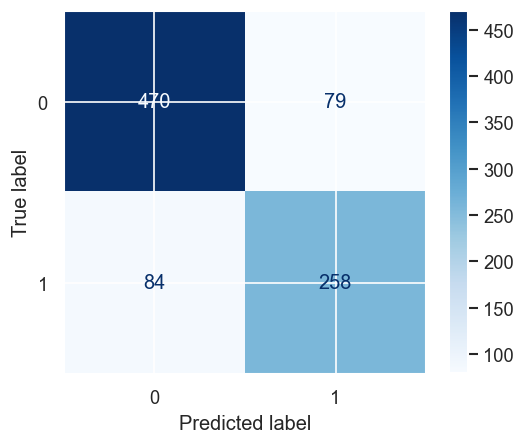

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

fig,ax = plt.subplots(figsize=(5,4), dpi = 120)
model = GaussianNB()
model.fit(X, y)
plot_confusion_matrix(model, X, y, ax=ax, cmap = 'Blues')

Text(34.5, 0.5, 'Predicted label')

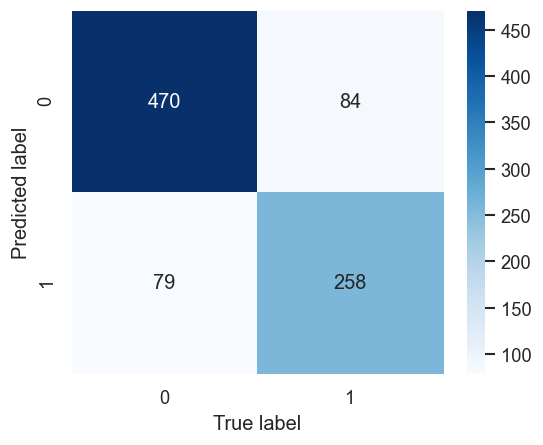

In [ ]:
model = GaussianNB()
model.fit(X, y)
y_pred = model.predict(X)
cm = confusion_matrix(y, y_pred).T
fig,ax = plt.subplots(figsize=(5,4), dpi = 120)
sns.heatmap(cm, cmap='Blues', annot=True, fmt='d', ax=ax)
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label')

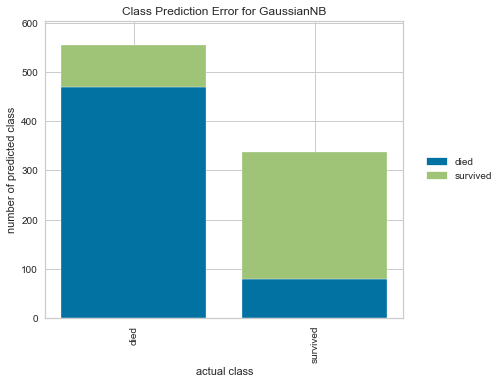

<AxesSubplot:title={'center':'Class Prediction Error for GaussianNB'}, xlabel='actual class', ylabel='number of predicted class'>

In [ ]:
from yellowbrick.classifier import ClassPredictionError

model = GaussianNB()
vs = ClassPredictionError(model,
    classes=['died', 'survived'], color = 'RdBu')
vs.fit(X, y)
vs.score(X, y)
vs.poof()


- [Discrimination Threshold](https://www.scikit-yb.org/en/latest/api/classifier/threshold.html): This visualizer only works for binary classification.
- [Precision-Recal Analysis](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#:~:text=The%20precision%2Drecall%20curve%20shows,a%20low%20false%20negative%20rate.) (1,1) 代表 Precision, Recall = 1 也就是完美預測，因此我們的PR曲線越往右上角凸起則代表更好的模型表現，反之越平則代表越差


- $AP=\sum_{n}(R_n - R_{n-1}\cdot P_n)$

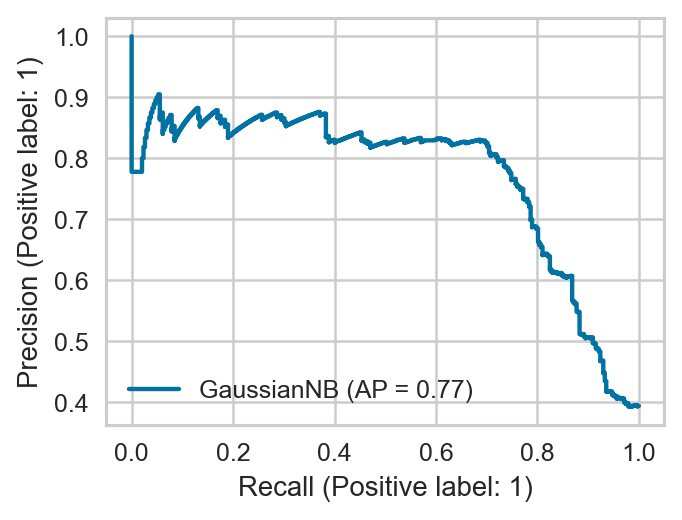

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.naive_bayes import GaussianNB


ax = start_plot(figsize=(4, 3), dpi = 180)
model = GaussianNB()
model.fit(X, y)
plot_precision_recall_curve(model, X, y,ax=ax)

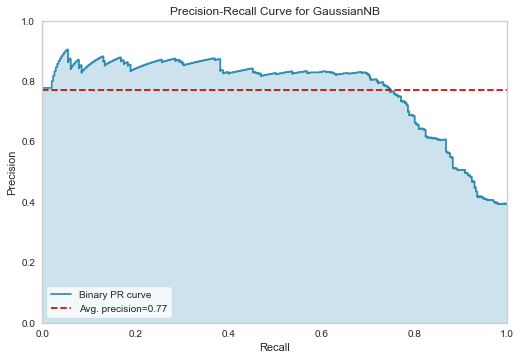

<AxesSubplot:title={'center':'Precision-Recall Curve for GaussianNB'}, xlabel='Recall', ylabel='Precision'>

In [ ]:
from yellowbrick.classifier import DiscriminationThreshold
from yellowbrick.classifier import PrecisionRecallCurve
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
vs = PrecisionRecallCurve(model, size = (600, 400))
vs.fit(X, y)
vs.score(X, y)
vs.poof()
# plt.show()

<AxesSubplot:title={'center':'Threshold Plot for LogisticRegression'}, xlabel='discrimination threshold', ylabel='score'>

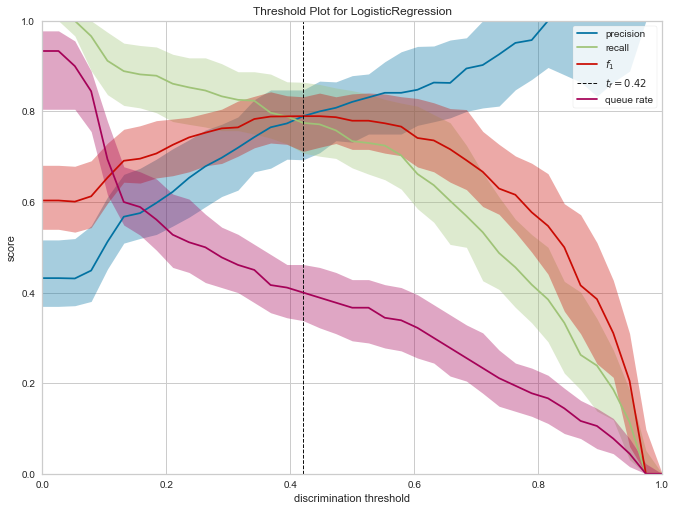

In [ ]:
from yellowbrick.classifier import DiscriminationThreshold
# 設定門檻值為預測結果--> 需要背景知識
from yellowbrick.classifier import PrecisionRecallCurve
from sklearn.naive_bayes import GaussianNB

model = LogisticRegression(max_iter=1000)
vs = DiscriminationThreshold(model, size = (800, 600))
vs.fit(X, y)
vs.score(X, y)
vs.poof(outpath = figure_dir + 'discri.png', dpi = 300)


# End of File